In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import genfromtxt
R,x=genfromtxt("dynconst.csv",delimiter=':',skip_header=1).T
len(R)

10

In [3]:
sx=.5
U0=3/150*70
R2=10
R0=.28
R1=R2*1e-3
I=U0*R1/R2/(R+R0)

In [4]:
#!/usr/bin/env python3
from numpy import *
def olsim(x,y,sx,sy):
	a=0
	for i in range(3):
		w=1/(sy**2+(a*sx)**2)
		Sw=sum(w)
		ax=sum(x*w)/Sw
		ay=sum(y*w)/Sw
		axy=sum(x*y*w)/Sw
		ax2=sum((x**2+sx**2)*w)/Sw
		ay2=sum((y**2+sy**2)*w)/Sw
		a=(axy-ax*ay)/(ax2-ax*ax)
	b=(ax2*ay-ax*axy)/(ax2-ax*ax)
	n=len(x)
	chi2=sum((y-a*x-b)**2/(sy**2+(a*sx)**2))
	s02=n/(n-2)*(ay2-ay*ay-(axy-ax*ay)*(axy-ax*ay)/(ax2-ax*ax))
	sa2=s02/n/(ax2-ax*ax)
	sb2=sa2*ax2
	sa=sqrt(sa2)
	sb=sqrt(sb2)
	return a,b,sa,sb,chi2

In [5]:
rc('figure', figsize=(11.7,8.27))
rc('font', size=16)
rc('text', usetex=True)
rc('text.latex', unicode=True)
rc('text.latex', preamble=r"\usepackage[utf8]{inputenc}")
rc('text.latex', preamble=r"\usepackage[T2A]{fontenc}")
rc('text.latex', preamble=r"\usepackage[russian]{babel}")

1.49128045028e-05 -1.28326281297e-05 2.1057943013e-06 1.34066480501e-05 0.0910761919322


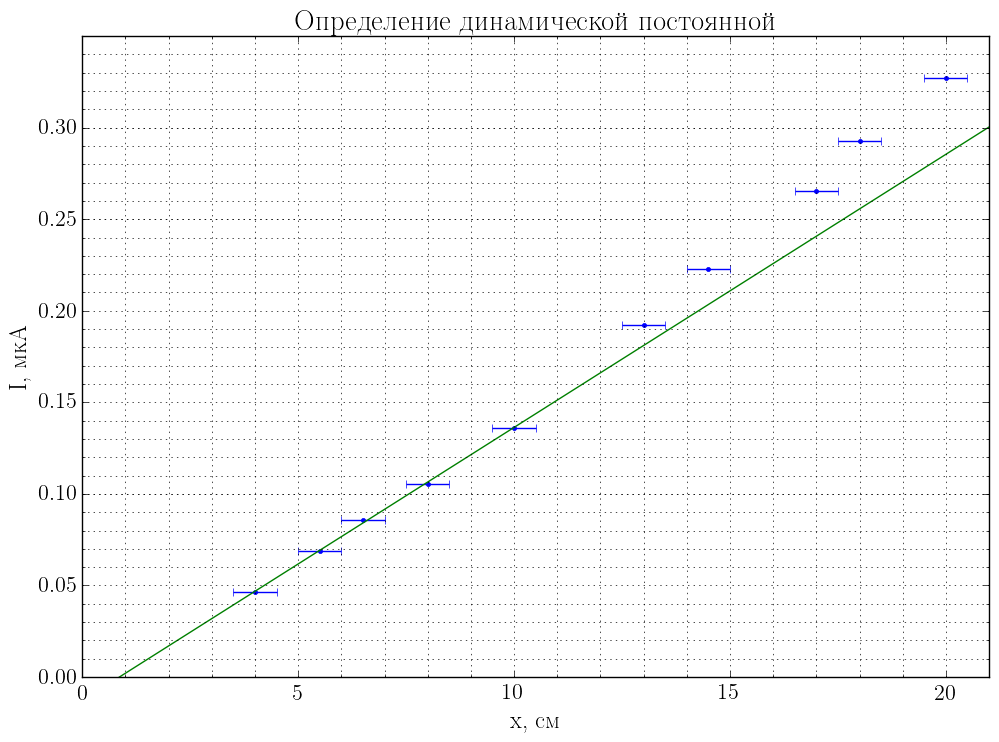

In [6]:
errorbar(x,1e3*I,xerr=sx,fmt='.')
lim=15e-5
aa,bb,saa,sbb,chi2=olsim(I[I<lim],x[I<lim],zeros(len(I[I<lim])),sx)
a,b,sa,sb=1/aa,-bb/aa,saa/aa**2,sqrt(sbb**2+(saa/aa)**2)/aa
arg=arange(0,25,1)
plot(arg,1e3*(a*arg+b))
print(a,b,sa,sb,chi2)
title('Определение динамической постоянной')
minorticks_on()
grid(which='both')
axis((0,21,0,.35))
xlabel('x, см')
ylabel('I, мкА')
savefig("dynconst.pdf")

0.00394257334664 -3.31994533868e-05 0.000158256139001 0.000158452542511 3.93906269762


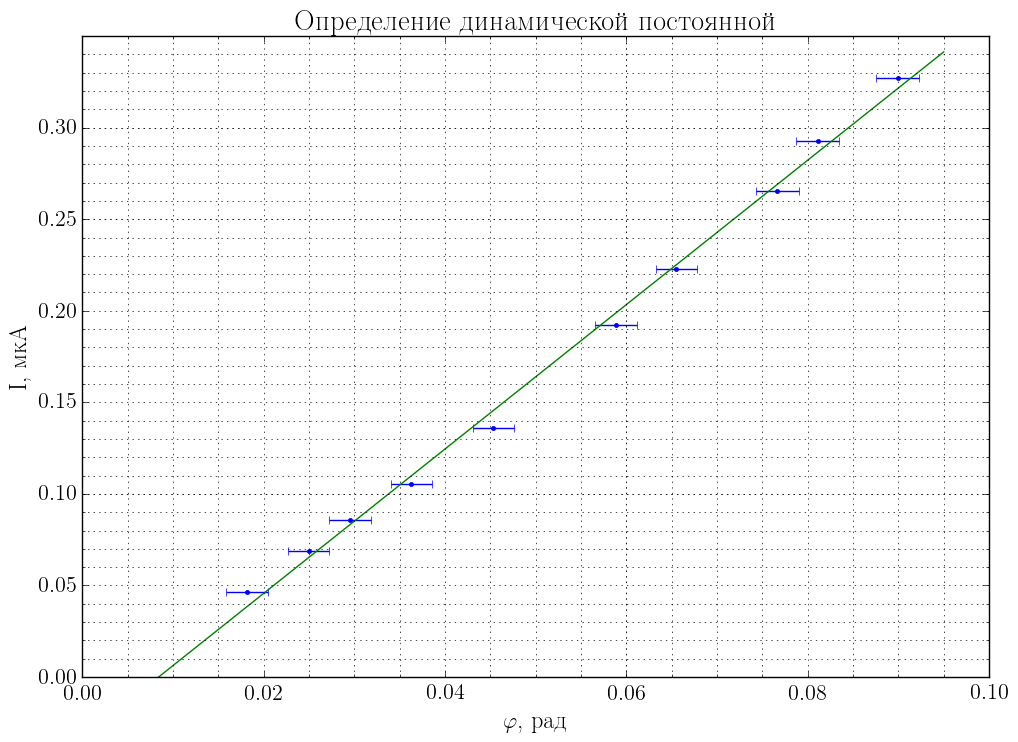

In [7]:
a=110
phi=arctan(x/a)/2
sphi=sx/a/(1-(x/a)**2)/2
errorbar(phi,1e3*I,xerr=sphi,fmt='.')
aa,bb,saa,sbb,chi2=olsim(I,phi,zeros(len(I)),sphi)
a,b,sa,sb=1/aa,-bb/aa,saa/aa**2,sqrt(sbb**2+(saa/aa)**2)/aa
arg=arange(0,.1,.005)
plot(arg,1e3*(a*arg+b))
print(a,b,sa,sb,chi2)
title('Определение динамической постоянной')
minorticks_on()
grid(which='both')
axis((0,.1,0,.35))
xlabel(r'$\varphi$, рад')
ylabel('I, мкА')
savefig("dynconst2.pdf")

In [8]:
n,xi=genfromtxt('Q.csv',delimiter=':',skip_header=1).T
sxi=.5
a,b,sa,sb,chi2=olsim(n,log(xi),0,sxi/xi)
Teta0,sTeta0=-a,sa
print(Teta0,sTeta0,chi2)

0.0634656076645 0.00397074991497 1.87554255564


In [9]:
R,x0,x1=genfromtxt('critres.csv',delimiter=':',skip_header=1).T
sx=.5
Teta=log(x0/x1)
sTeta=sx/x0

0.0199331515119 -0.0408086527976 0.000922804624596 0.0141328198517 4.85659673235
0.847280897643 0.104374867661 4.85659673235


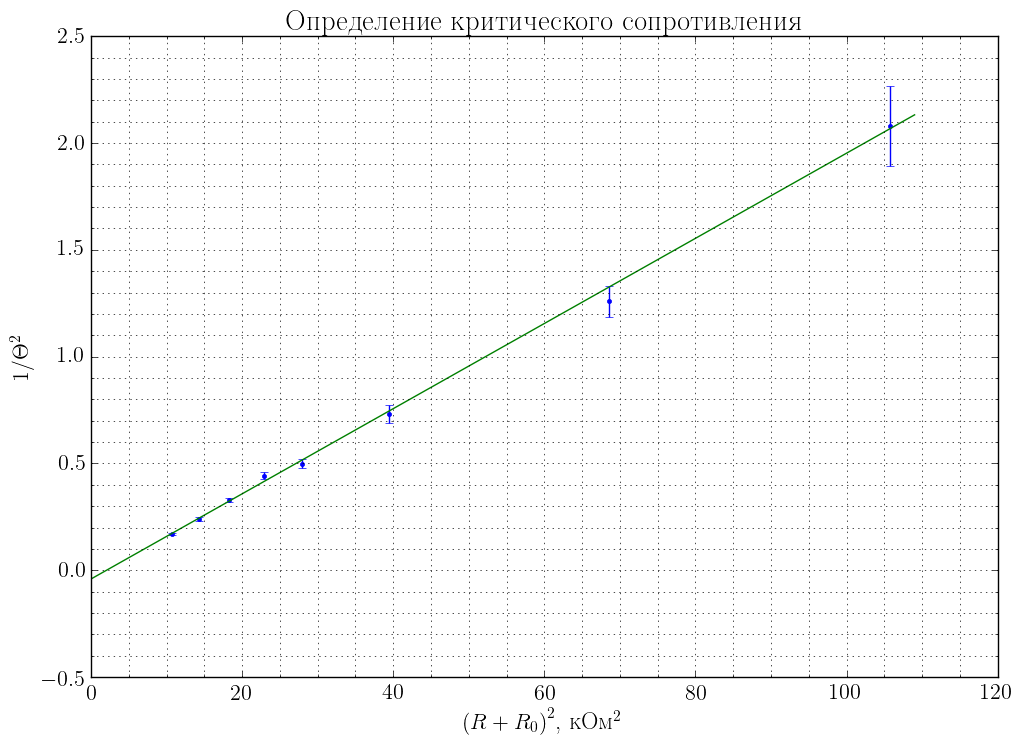

In [10]:
errorbar((R+R0)**2,1/Teta**2,yerr=2*sTeta/Teta**3,fmt='.')
a,b,sa,sb,chi2=olsim((R+R0)**2,1/Teta**2,0,2*sTeta/Teta**3)
print(a,b,sa,sb,chi2)
arg=arange(0,110)
plot(arg,a*arg+b)
Rcr=1/(2*pi*sqrt(a))-R0
sRcr=sa/(pi*a**1.5)
print(Rcr,sRcr,chi2)
title('Определение критического сопротивления')
minorticks_on()
grid(which='both')
#axis((0,.1,0,.35))
xlabel(r'$\left( R+R_0 \right)^2$, кОм$^2$')
ylabel(r'$1/ \Theta^2$')
savefig("critres.pdf")

In [11]:
R,l=genfromtxt('balconst.csv',delimiter=':',skip_header=1).T
sl=.5
len(l)

10

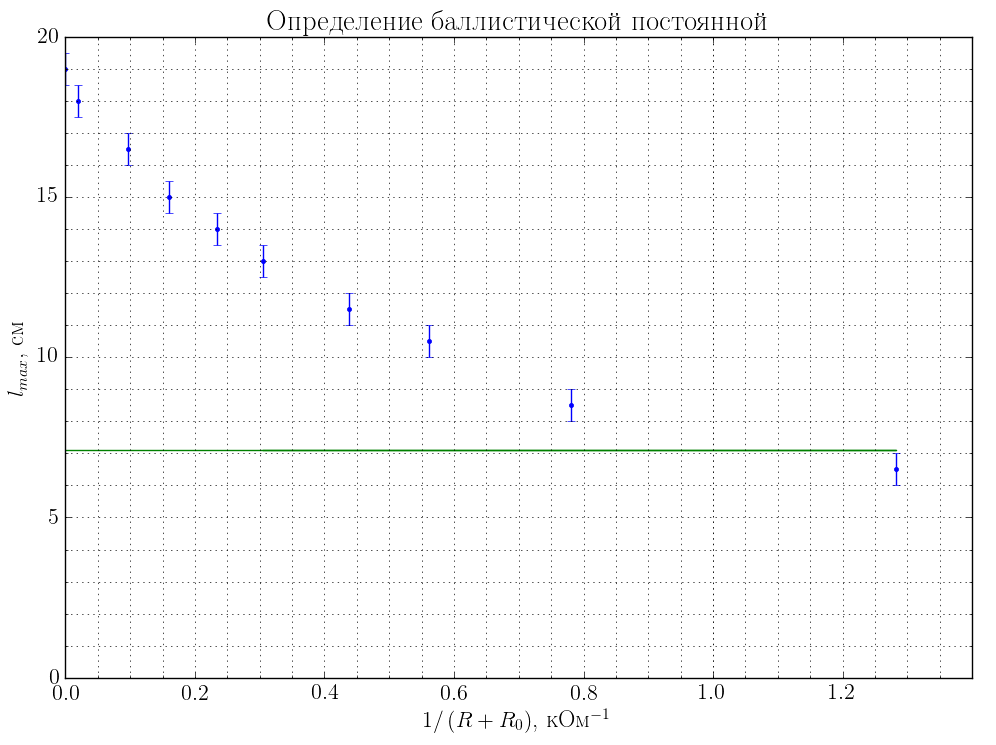

In [12]:
errorbar(1/(R+R0),l,yerr=sl,fmt='.')
plot(1/(R+R0),l*l[0]/l*exp(Teta0/4-1))
title('Определение баллистической постоянной')
minorticks_on()
grid(which='both')
axis((0,1.4,0,20))
xlabel(r'$1/ \left( R+R_0 \right)$, кОм$^{-1}$')
ylabel(r'$l_{max}$, см')
savefig("balconst.pdf")

In [13]:
a2=220
R1=.1*R2
C=2e-6
Ccr=a2*R1/R2*U0*C*exp(1-Teta0/4)/l[0]
sCcr=sl/l[0]*Ccr
print(Ccr,sCcr)

8.67422937867e-06 2.28269194175e-07


In [14]:
tau=R0*C
T0=27.6/5
print(tau,T0)

5.6e-07 5.5200000000000005
